<a href="https://colab.research.google.com/github/ewinge1/ewinge1.github.io/blob/master/CodeAlongML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from IPython.display import clear_output
import sklearn

#Linear Regression

In [ ]:
# Download and load the dataset, this process differs between different datasets, but there are generally many datasets available online
urllib.request.urlretrieve("https://raw.githubusercontent.com/CC-MNNIT/2018-19-Classes/master/MachineLearning/2018_08_22_Logical-Rhythm-2/data.csv", "data.csv")
data = np.genfromtxt('data.csv', delimiter=',')

We are using a dataset that contains the time spent studying for a test and the result on that test. The time spent studying is placed in x (because it's the dependent variable, our input). The test result is placed in y.

In [ ]:
x = np.array(data[:, 0])
y = np.array(data[:, 1])

# Plot our dataset
plt.scatter(x, y)
plt.xlabel('Hours of Study')
plt.ylabel('Test Scores')
plt.title('Studying and Test Scores')
plt.show()

In [ ]:
def plot_lin_reg(x, y, m, b):
  # Plots a linear regression. Can be called in succession to create an animation
  # Plots the dataset of x, y, and the line defined by m, b
  plt.scatter(x, y)
  y_pred = None #TODO: What should our line look like given m, x, and b?
  plt.plot(x, y_pred, color='orange', label='m={:.2f}, b={:.2f}'.format(m, b))
  plt.legend()
  plt.xlabel('Hours of Study')
  plt.ylabel('Test Scores')
  plt.title('Studying and Test Scores')
  clear_output(wait=True) # Clears the ipynb display for animation purposes
  plt.show()
  plt.pause(0.25)

In [ ]:
def f(x, params):
  # Our Linear Regression Model, params is a tensor containing [m, b]
  # You can index into tensors the same way you index into arrays
  # you can also do:
  # m = params[0]
  # b = params[1]
  y = None # TODO: What should y be?
  return y

def mse(y_pred, ground_truth):
  # Returns the Mean Squared Error between our predictions (y_pred) and the ground truth
  # Hint: numpy and torch both have mean functions you can use
  # torch.mean(tensor) or np.mean(array)
  squared_error = None #TODO
  mean_squared_error = None #TODO
  return mean_squared_error

In [ ]:
# Initialize our parameters (m, b) to be (0, 0)
# PyTorch will automatically calculate the gradient for us, we just have to tell it we need it (requires_grad_())
params = torch.zeros(2).requires_grad_()
print("Initial Parameters: ", params)

# Torch requires things to be its own Tensor data structure (like arrays in numpy)
y = torch.tensor(y)
x = torch.tensor(x)

In [ ]:
# n_epochs is how many iterations we will run our algorithm for
n_epochs = 150

# The learning rate controls the step size for each iteration.
# Too large of a learning rate causes the algorithm not to converge
# too small causes the algorithm to run slowly or get stuck along the way
lr = 1e-5

loss = 0

for i in range(n_epochs):
  # Run our input (x) through our model (f) to get our predictions (y_pred)
  y_pred = f(x, params)
  # Compute the error between our predictions (y_pred) and the ground truth (y)
  loss = mse(y_pred, y)

  # Compute the gradient of our loss calculation
  loss.backward()
  # Take a small step in the direction of the negative gradient
  # (the gradient, like derivatives, give how fast the function increases, but we want our loss function to go down, so we add the negative gradient)

  params.data -= lr * params.grad.data

  # Reset the gradient. Torch gets mad if you call backward() twice without resetting
  params.grad = None

  if i % 5 == 0:
    #Plot/Print every so often
    plot_lin_reg(x, y, params[0].detach(), params[1].detach())
    print('epoch {}: loss: {}'.format(i, loss))

In [ ]:
print(params)

So the best parameters we've found are m=1.4782 and b=0.300!

How well do you think someone who studied for 80 hours would do?
We can try and predict by evaluating our model f(80) = 1.4782 * 80 + 0.300 = 118.56. How much do we trust this number? We know how well the data did on our dataset, but how would it do if we tried it on other data for this test?

#Evaluating Models

We have completed trained our own linear regression model, and it looks like it represents the data fairly well. How well do we think it will do if we brought in new data? We can look at our total error to get an idea of how well the model did, and it looks quite good, so it might be able to <i>generalize</i> well to new data. It's not always the case that doing well on your dataset means that you can generalize well. To demonstrate this, we'll fit a series of new models using numpy's polyfit method.

##Training Absurd Models
Linear models are the simplest models that we can fit to a dataset. We will move on to polynomial regression, which generalizes regression to any degree polynomial (a 3rd degree polynomial would be f(x) = a<sub>0</sub> + a<sub>1</sub>x<sup>1</sup>+ a<sub>2</sub>x<sup>2</sup> + a<sub>3</sub>x<sup>3</sup>)

Typically, the more complicated your model, the more <i>representative</i> power it has and the more complicated datasets it can work on. However, it's possible for your model to be too complicated. Let's train a series of polynomial regressions up until a 100 degree polynomial and see what happens

In [ ]:
def plot_poly_reg(x, y, poly):
  # Plots a linear regression. Can be called in succession to create an animation
  plt.scatter(x, y)
  # This time, I want to plot the polynomial not just whever we have data, but evenly throughout our domain
  domain = np.linspace(min(x), max(x), 5000)
  plt.plot(domain, poly(domain), color='orange')

  plt.xlabel('Hours of Study')
  plt.ylabel('Test Scores')
  plt.title('Studying and Test Scores')
  plt.ylim(min(y), 1.05 * max(y))
  clear_output(wait=True)
  plt.show()
  plt.pause(0.05)

for i in range(100):
  # Now we'll use numpy's polynomial regression tool
  # numpy has a np.polyfit function, which takes (x, y, degree)
  # and returns the parameters that best fit the data for the given degree polynomial.
  # Fit a polynomial of degree i to our data
  params = None #TODO

  # Poly1d lets you give numpy an array of parameters and gives you a callable function, that takes an input x
  polynomial = np.poly1d(params)
  plot_poly_reg(x, y, polynomial)

MSE of this model:

In [ ]:
y_pred = polynomial(x)
print("MSE of 100 degree polynomial: ", mse(torch.tensor(y_pred), y))

Our model does quite well where are data actually is, it passes almost perfectly through all points with x>65. However, it clearly won't be right where are data currently isn't, around x=30, x=70, or any other time the function leaves our screen. This model is worse than the linear regression and unusable with new data that might not fall exactly where our old data fell. This model has <i>overfit</i> our dataset, such that it is accurate for our data, but not for anything else. But our evaluation metric is telling us that it's better! Our evaluation method is flawed.

##Training/Test Dataset Split
We can test how likely our model is to generalize by splitting up our dataset. We'll use some of the data to train our model, this part of the data will be our <i>training set</i>. The other part of our dataset, the <i>test set</i>, will only be used for evaluating our model (no part of it is used for fitting or training our model!). We can then test our error on our test set to see if our model generalizes to data that it didn't have during the training process.

In [ ]:
from sklearn.model_selection import train_test_split
# sklearn has a built in train/test split function we can use
# It takes train_test_split(data, labels, test_size=)
# Make the split such that the test size is 0.15 of the whole dataset

x_train, x_test, y_train, y_test = None #TODO

print("Original Dataset size: {}, Training set size: {}, Test set size: {}".format(len(x), len(x_train), len(x_test)))

Training new models (now only with numpy's built in functions)


In [ ]:
# A Line is just a deg=1 polynomial
# Use np.polyfit to fit a line on just the training set
lin_reg_coeffs = None #TODO

# We'll bump our degree down to 75 for our polynomial regression.
# Having a higher degree than the number of points can lead to issues
# (imagine fitting a line through 1 point, there's a lot of possible lines, but even more possible parabolas/cubic functions etc.
poly_reg_coeffs = np.polyfit(x_train, y_train, deg=75)

lin_reg = np.poly1d(lin_reg_coeffs)
poly_reg = np.poly1d(poly_reg_coeffs)

In [ ]:
plot_poly_reg(x, y, lin_reg)

In [ ]:
plot_poly_reg(x, y, poly_reg)

Now let's compare their performance on the train and test sets

In [ ]:
#TODO: compute the predictions for the linear regression and the polynomial regression for test and train sets
y_lin_pred_test = None
y_lin_pred_train = None
y_poly_pred_test = None
y_poly_pred_train = None
print("Linear Regression MSE on Train Set: {}, and the Test Set: {}".format(
    mse(y_train, y_lin_pred_train),
    mse(y_test, y_lin_pred_test)))
print("Polynomial Regression MSE on Train Set: {}, and the Test Set: {}".format(
    mse(y_train, y_poly_pred_train),
    mse(y_test, y_poly_pred_test)))

It's an exaggerated example, but our polynomial regression has a very high test error. A higher test error than train error is an indication that your model has overfit to your training set. In our case we actually do better on the test set, this is likely because no outliers were put into the test set (by random chance).

#Neural Networks

In [ ]:
from torch import nn

# We'll make NNs by making classes to hold them
# These classes must inherit from nn.Module to be used with Torch
# nn.Module provides a backward() function automatically (you don't have to compute your own gradients!)
class my_NN(nn.Module):
  # General one layer NN, adjustable number of inputs/output/width
  def __init__(self, n_inputs, n_outputs, width):
    # You always have to call the constructor of super first thing (runs constructor of nn.Module)
    super().__init__()

    # Make two linear layers, one that goes from n_inputs to a certain width
    self.linear1 = nn.Linear(n_inputs, width)
    # And the second that moves from that width to the correct number of outputs
    self.linear2 = nn.Linear(width, n_outputs)

    # The activation function we'll use, ReLU is just a fancy x=max(0, x)
    self.relu = nn.ReLU()


  def forward(self, x):
    # The forward operations that take place in our model
    # You have to implement this (often the only function in your class)
    # You don't have to immplement backward(), which is much more complicated
    x = self.linear1(x)
    x = self.relu(x)
    x = self.linear2(x)
    # Don't bother thinking of good names for intermediate variables, the standard is always to use x=layer(x)
    # This is a short model, making a bunch of other intermediate variables will be painful in bigger models
    return x

## The Dataset

We will look at Boston housing prices (from the 1970s). The dataset gives information on regions in Boston. For each region we are given a set of features. These features can be seen here: https://www.kaggle.com/c/boston-housing. They include things like if it's in an industrial part of town, or near the river, or the number of teachers in their public schools. The goal is to predict the median value of the houses in this area.

In [ ]:
import keras.datasets.boston_housing
# Load the data
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# Convert to a tensor and change the datatype from double to float (gives an error later if you don't)
train_features = torch.tensor(train_features).float()
train_labels = torch.tensor(train_labels).float()
test_features = torch.tensor(test_features).float()
test_labels = torch.tensor(test_labels).float()

In [ ]:
#https://keras.io/api/datasets/boston_housing/
print(train_features.shape)
print(train_labels.shape)

# Look at the ground truth values
print("Example Labels: {}".format(train_labels[0:5]))

num_examples = train_features.shape[0]
# 13 input features for each house are given
n_in = train_features.shape[1]

# We're just estimating the cost (1 output), we'll see an example with multiple outputs next.
n_out = 1

print("Number of inputs {}, Number of elements in the dataset {}, Number of outputs {}".format(n_in, num_examples, n_out))

In [ ]:
# Make a Neural Network with the appropriate inputs and outputs
model = my_NN(n_in, n_out, 16)

In [ ]:
# Before training
print("Prediction: {}, Ground Truth {}".format(model(train_features[0]), train_labels[0]))

In [ ]:
from torch import optim

# Remake it here just so we don't train the same model twice
model = my_NN(n_in, n_out, 16)

# The optimization method we'll use is Adam, it's like SGD, but better
optimizer = optim.Adam(params=model.parameters(), lr=1e-3)

# How many passes through the dataset we'll perform
n_epochs = 10

for i in range(n_epochs):
  # We'll iterate through the features and labels together with the zip function
  for features, label in zip(train_features, train_labels):
    # For a set of features, get our predicted housing cost
    y_pred = model(features)

    # Figure out how far off we are from the correct value
    loss = mse(y_pred, label)

    # Now the pytorch stuff:
    # find the gradient
    loss.backward()
    # Take a step in that direction
    optimizer.step()
    # And reset the gradient
    optimizer.zero_grad()
  print("Error for entire dataset: ", mse(model(train_features), train_labels).item())

In [ ]:
n_epochs = 25
model = my_NN(n_in, n_out, 16)
optimizer = optim.Adam(params=model.parameters(), lr=1e-3)
losses = []
batch_size = 16

for i in range(n_epochs):
  # We'll print the training loss every epoch
  # You MUST call .item(), which get's the number for the training loss and separates it from the gradient
  # If you don't call .item(), you WILL run out of memory at some point, the gradient takes a lot of memory to store
  train_loss = mse(model(train_features), train_labels).item()
  losses.append(train_loss)
  print("Training Loss: ", train_loss)
  # Same stuff so far, just going to keep track of which batch we're on with an enumerate as well
  for j, (features, label) in enumerate(zip(train_features, train_labels)):
    y_pred = model(features)

    loss = mse(y_pred, label)
    loss.backward()
    # The main difference from the last cell: Only take steps after every batch, not every item
    if j % batch_size == 0 or j == len(train_features):
      optimizer.step()
      optimizer.zero_grad()

print("Final MSE on training set: ", mse(model(train_features), train_labels).item())
print("Final MSE on Test set: ", mse(model(test_features), test_labels).item())

In [ ]:
# Plot what our loss function looked like during training
# note how it's not always decreasing, why might that be?
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Error while Training")
plt.show()

## Hyperparameter Tuning

Machine Learning models generally have parameters which are being optimized for during the training process. In Linear Regressions, these are m and b, the slope and bias variables. In Neural Networks, the parameters are the weights and biases for each neuron. There are another set of variables that we have control of, called <i>hyperparameters</i>. These are variables that are set by the programmer, including things like the learning rate, batch size, loss function, and, importantly, the <i>model architecture</i>. The model architecture includes the width (number of neurons per layer) and depth of the model (how many layers), the activation functions used (ReLU/tanh/sigmoid), and the types of layers used (convolutional layers/linear layers/other specialized layers). Hyperparameter tuning is a bit of an art that relies on building intuition on which variables will effect the training in which ways. What happens when you make the NN much larger? What happens when you drop the learning rate and continue the training process for 1000 epochs? Play around with the hyperparameters for our model and training process and see if you see any trends. Keep in mind there is randomness in how the wieghts in the NN are initialized, so if you run it twice in a row it won't produce the same results.

In [ ]:
# With a very large model (1000 nodes in our hidden layer)
n_epochs = 25
print("Trying with a very-very large model")
model = my_NN(n_in, n_out, 1000)
optimizer = optim.Adam(params=model.parameters(), lr=1e-3)
losses = []
batch_size = 16

for i in range(n_epochs):
  train_loss = mse(model(train_features), train_labels).item()
  losses.append(train_loss)
  print("Training Loss: ", train_loss)
  for j, (features, label) in enumerate(zip(train_features, train_labels)):
    y_pred = model(features)

    loss = mse(y_pred, label)
    loss.backward()
    if j % batch_size == 0 or j == len(train_features):
      optimizer.step()
      optimizer.zero_grad()

print("Final MSE on training set: ", mse(model(train_features), train_labels).item())
print("Final MSE on Test set: ", mse(model(test_features), test_labels).item())
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Error while Training")
plt.show()

##Validation Sets
In our code, we looked at the performance on training set, and while it doesn't look like we're overfitting (train and test loss are roughly the same at the end of training), it is tempting to check how we're doing on the test set throughout the training process and tune our Hyperparameters to optimize performance on the test set. Even better, we could look at the test loss during training and select the model with the lowest error that we see (the loss often hits its lowest point prior to when we finish training). This is <b>bad</b> science. You must avoid changing hyperparameters or early stopping looking for better test performance because then you are fitting the hyperparameters to the test set, which defeats the purpose of the test set being separate from the training set. The test set is only for evaluating and understanding how our model would work on data we haven't seen yet. If we use it to inform our model, then it no longer works for understanding how our model will work with unseen data.

That's why we often use a third dataset, the <i>validation set</i>, in addition to the train and test set. The validation set is like the test set, we don't use it to train our model (don't calculate loss and call backward on it), but we can look at it during training to understand how we might be doing on the test set. We can use the validation set to tune hyperparameters and maybe even stop the training early if we notice the validation error starting to increase. Since we only look at test error at the very end (when you're put tables in your paper, say), we keep the sanctity of the test set in tact.

In [ ]:
# Let's grab the dataset again
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()
train_features = torch.tensor(train_features).float()
train_labels = torch.tensor(train_labels).float()
test_features = torch.tensor(test_features).float()
test_labels = torch.tensor(test_labels).float()

In [ ]:
# We could use train/test split as well, just showing different ways of doing things
print("Original Training set Length ", len(train_features))
validation_features, validation_labels = train_features[int(0.85*len(train_features)):], train_labels[int(0.85*len(train_features)):]
train_features, train_labels = train_features[:int(0.85*len(train_features))], train_labels[:int(0.85*len(train_features))]

print(len(validation_features), len(train_features))

# And just repeating the same training process we had previously
n_epochs = 25
model = my_NN(n_in, n_out, 16)
optimizer = optim.Adam(params=model.parameters(), lr=1e-3)
losses = []
v_losses = []
batch_size = 16

for i in range(n_epochs):
  train_loss = mse(model(train_features), train_labels).item()
  losses.append(train_loss)

  # This time we'll print out our validation loss as well.
  validation_loss = mse(model(validation_features), validation_labels).item()
  v_losses.append(validation_loss)

  print("Training Loss: {}, Validation Loss {}: ".format(train_loss, validation_loss))
  for j, (features, label) in enumerate(zip(train_features, train_labels)):
    y_pred = model(features)

    loss = mse(y_pred, label)
    loss.backward()
    if j % batch_size == 0 or j == len(train_features):
      optimizer.step()
      optimizer.zero_grad()

print("Final MSE on training set: ", mse(model(train_features), train_labels).item())
print("Final MSE on Test set: ", mse(model(test_features), test_labels).item())
plt.plot(losses, label='training loss')
plt.plot(v_losses, label='validation loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Error while Training")
plt.show()

# Deep Learning: Convolutional Neural Networks
We will now look at convolutional neural networks, which use convolutional layers in our network architecture. Convolutions were used for a long time in computer vision tasks before being incorporated into neural networks. Convolutions are essentially operations on a small section of an image (e.g., 3x3 pixels) that are repeated on every section of the image. [This article](https://purnasaigudikandula.medium.com/a-beginner-intro-to-convolutional-neural-networks-684c5620c2ce) has some good examples of the different things convolutions (filters) are capable of, including edge detection, sharpening, and blurring. Prior to NNs, researchers would develop specific filters that would help them do certain tasks, like edge detection filters for lane detection in autonomous driving tasks. Convolutions began to be included in neural networks, with the idea being to have the parameters of the convolution be trained by the neural network rather than developed by hand. In 2012, the first major breakthrough took place where Convolution Neural Networks (CNNs) out performed traditional methods by doing a large series of convolutions (very deep network), and there has been an explosion of research on CNNs and deep learning ever since.

## MNIST
MNIST is a dataset of digits that long stood as a benchmark for computer vision methods. It no longer is used much in research, as methods can now achieve very high accuracy on this simple dataset, but for many years in the 1990s and 2000s, it was a standard benchmark in many papers. Each piece of data contains a 28x28 black and white image of a digit and a label which is the correct label for that image. Our goal is to predict that label.

## Classification
MNIST is best tackled as a classification task, rather than a regression task. It doesn't make a whole lot of sense to use MSE in this scenario. If we are trying to predict a 0, but incorrectly predict a 9, it shouldn't count against our model worse than predicting it as a 1. Using MSE, the loss for a 9 prediction would be MSE=81, but just MSE=1 for a prediction of a 1. Instead, we will output 10 outputs from our network (one for each digit) and take the highest output to be what the model predicts.

Instead of MSE, we will use a loss function called <i>Cross Entropy Loss</i>, which is used for classification tasks. https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [ ]:
import torchvision

batch_size_test = 64
batch_size_train = 64

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [ ]:
i, (example_data, label) = next(enumerate(train_loader))
print("Shape of each batch: ", example_data.size())
fig = plt.figure()
plt.imshow(example_data[0][0], cmap='gray', interpolation='none')
fig.show()
print("Label: ", label[0])
print("6x20 section of the image: \n", example_data[0][0][:20, 10:16])

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # CNN layers take the number of channels (colors, for instance) in an image
        # Convolutions can actually work for any size (w x h) image as long as the number of channels is the same
        # The kernel size is the size of the filter used, read the medium article for more info on filters/convolutions
        # The stride is how far you shift the filter after each application
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1)

        # Figuring out the number of inputs to the linear section is always a challenge
        # I usually run the model and read what the error message says the size should be
        # There is an exact formula for figuring out how many outputs each convolution has,
        # but it's complicated and you might have to do it many times
        self.fc1 = nn.Linear(80, 50)
        self.fc2 = nn.Linear(50, 10)

        # Pooling is a non-linear operation used often in image processing
        self.pool = nn.MaxPool2d(kernel_size=3)
        self.relu = nn.ReLU()

        # Finally, classification uses a softmax, which is a differentiable version of the max function
        # Softmax converts an array of numbers into an array of numbers that sum to 1
        # The original array slot that was largest will be largest in the new array
        # You can also use this in RL to convert outputs to probabilities
        self.softmax = nn.Softmax()

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.pool(x)
        x = self.relu(x)

        # Convolutions produce tensors with more dimensions and we need to convert them to a 1d array
        # We can also use nn.Flatten()
        # We need to reshape it into (b x L), where b is the batch size and L is the input to the linear layer
        # If you know batch size ahead of time, you can use that
        # If you know your linear layer size you can use that
        # -1 is a placeholder for pytorch, it says I have 320 floats I need to reshape to be (x, 80) where x is unknown
        # And pytorch does the reshaping for you. In that case, it makes a (4x80) tensor
        x = x.view(-1, 80)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return self.softmax(x)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # We can keep things cleaner by using nn.Sequential, which will do the operations in the order they are given
        # Each operation running on the output of the previous layer
        self.convolutions = nn.Sequential(
                      nn.Conv2d(1, 10, kernel_size=3, stride=1),
                      nn.MaxPool2d(kernel_size=3),
                      nn.ReLU(),
                      nn.Conv2d(10, 20, kernel_size=3, stride=1),
                      nn.MaxPool2d(kernel_size=3))
        self.linear_layers = nn.Sequential(
                      nn.Linear(80, 50),
                      nn.ReLU(),
                      nn.Linear(50, 10),
                      nn.Softmax())

    def forward(self, x):
        batch_size = x.size()[0]
        x = self.convolutions(x)
        x = x.view(batch_size, -1)
        y = self.linear_layers(x)
        return y

In [ ]:
def train(train_loader, model, n_epochs, learning_rate=1e-4):
    losses = []
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    loss_fn = nn.CrossEntropyLoss()
    for epoch in range(n_epochs):
      # We'll use PyTorch's built in dataloaders here, which make batches easier to work with
      for batch_idx, (data, labels) in enumerate(train_loader):
        batch_loss = 0
        y_preds = model(data)
        loss = loss_fn(y_preds, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # And we'll keep the losses around for plotting
        losses.append(loss.item())
    return losses

In [ ]:
model = CNN()
losses = train(train_loader, model, 5)

plt.plot(losses)
plt.xlabel("Number of batches processed")
plt.ylabel("Cross Entropy Loss")
plt.title("Training loss for MNIST")
plt.show()

##GPUs and CUDA

The GPU (Graphical Processing Unit) turns out to be perfectly suited to running neural networks. Graphics (for games, videos, or simulations) require lots of parallel operations and matrix multiplication (think thousands of cores rather than the 8 cores on your laptop CPU, but each GPU core is very weak on its own). Running Neural Networks can be sped up significantly by doing all the weights and biases in parallel on the GPU. (What's really happening is a large matrix multiplication, each cell in the output matrix can be computed independently of the other cells).

CUDA is Nvidia's GPU language. Torch and other libraries are able to use CUDA behind the scenes for you. Colab also gives you a GPU to use for free! Which is great because the GPU I'm currently on is a Tesla T4, which is currently going for over $2,000 for just the GPU.

In [ ]:
from tqdm import tqdm
# tqdm is a great tool and you should use it! It makes nice progress bars for your loops
# just put tqdm(the thing you're looping over): and it does it automatically

def train(train_loader, model, n_epochs, learning_rate=1e-4,gpu=True):
    # It took a while without a GPU, let's add our model to the GPU and speed it up!
    losses = []
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    loss_fn = nn.CrossEntropyLoss()
    for epoch in tqdm(range(n_epochs)):
      for batch_idx, (data, labels) in enumerate(train_loader):

        #This is the only thing we have to add! Just call .cuda() to put the data on the GPU!
        if gpu:
          data = data.cuda()
          labels = labels.cuda()
        batch_loss = 0
        y_preds = model(data)
        loss = loss_fn(y_preds, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.item())
    return losses

if torch.cuda.device_count() > 0:
  cuda = True
  # GPU is available!
  print(torch.cuda.get_device_name(0))
  # Call .cuda() to put the model on the GPU, everything else is the same
  model = CNN().cuda()
  losses = train(train_loader, model, 5)
  plt.plot(losses)
  plt.xlabel("Number of batches processed")
  plt.ylabel("Cross Entropy Loss")
  plt.title("Training loss for MNIST")
  plt.show()
else:
  print("No GPU :(, go enable at edit->settings->hardware acceleration->gpu")
  print("Rerun necessary cells")

In [ ]:

i, (example_data, label) = next(enumerate(train_loader))
print("Shape of each batch: ", example_data.size())
fig = plt.figure()
plt.imshow(example_data[0][0], cmap='gray', interpolation='none')
fig.show()
print("Label: ", label[0])
if cuda:
  print("Prediction: ", model(example_data.cuda())[0])
  print("-----------")
  print("Predicted Label: ", torch.argmax(model(example_data.cuda())[0]).item())
  print("-----------")
else:
  print("Prediction: ", model(example_data)[0])
  print("-----------")
  print("Predicted Label: ", torch.argmax(model(example_data)[0]).item())
  print("-----------")

In [ ]:
def confusion_matrix(data_loader, model):
  right = 0
  total = 0
  confusion = np.zeros((10, 10))
  for (data, labels) in data_loader:
    preds = model(data)
    predicted_digits = torch.argmax(preds, dim=1)
    for l, p in zip(labels, predicted_digits):
      # Check if we got it right for every digit in the batch
      if l == p:
        right += 1
      total += 1
      confusion[l, p] += 1
  print("Accuracy: ", right / total)
  print("{} Correct out of {} Total".format(right, total))
  plt.title("Confusion Matrix")
  plt.xlabel("True Label")
  plt.ylabel("Predicted Label")
  plt.imshow(confusion, cmap="coolwarm")
  plt.show()
print("Training Set Results")
confusion_matrix(train_loader, model.cpu())

print("Test Set Results")
confusion_matrix(test_loader, model.cpu())

# AlexNet
AlexNet was the paper that came out in 2012 and revolutionized the field of deep learning and computer vision. It was the first deep learning model to achieve performance better than traditional image recognition methods. Here, we will re-implement their model and training. We will skip many of the tricks they use to optimize performance during training, but the network architecture will be the same. Diagrams of NNs are often provided in papers, and our goal is to reconstruct their model from their specifications. AlexNet was originally trained for imagenet, that's too big for us (~14 million images), we're going to use CIFAR10, a dataset with 10 classes of images and fewer examples of each.

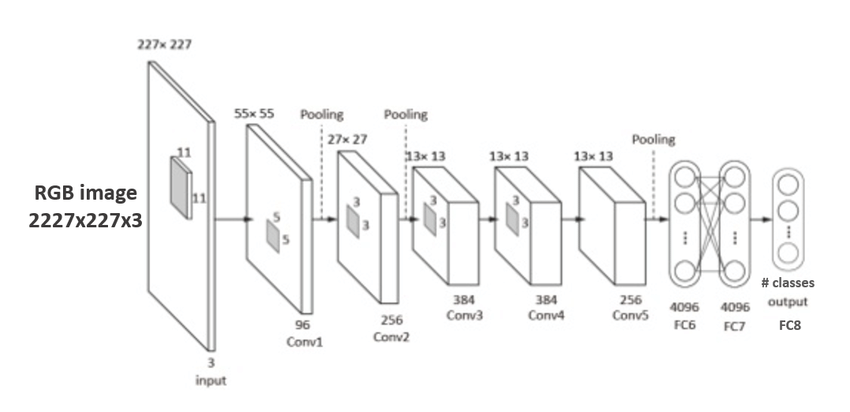

Convolutions are represented typically as 3-D rectangular polyhedra. In this diagram, the number of input channels are given below each convolution (3, 96, 256,...). The filter/convolution size is denoted here by a grey rectangle (11x11, 5x5, 3x3,...). They denoted with dotted arrows where they do pooling. Each convolution and linear layer is followed by a ReLU, they just don't label it every time. Linear layers (here referred to as FC:fully-connected) are also listed with their widths (4096). Now that we understand the order of layers, let's go implement it!

In [ ]:
class AlexNet(nn.Module):
  def __init__(self):
    super(AlexNet, self).__init__()
    # self.conv1 = nn.Conv2d(3, 6, 5)
    # self.pool = nn.MaxPool2d(2, 2)
    # self.conv2 = nn.Conv2d(6, 16, 5)
    # self.fc1 = nn.Linear(16 * 5 * 5, 120)
    # self.fc2 = nn.Linear(120, 84)
    # self.fc3 = nn.Linear(84, 10)
    # self.relu = nn.ReLU()
    # self.flatten = nn.Flatten()
    # self.net = nn.Sequential(
    #     self.conv1,
    #     self.relu,
    #     self.pool,
    #     self.conv2,
    #     self.relu,
    #     self.pool,
    #     self.flatten,
    #     self.fc1,
    #     self.relu,
    #     self.fc2,
    #     self.relu,
    #     self.fc3,
    # )
    self.convs = nn.Sequential(
            # Input is (b x 3 x 227 x 227)
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=5, stride=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1),
            nn.Conv2d(96, 256, 5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1),
            nn.Conv2d(256, 384, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(384, 384, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(384, 36, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1),
    )


    self.linear = nn.Sequential(
        nn.Linear(576, 256),
        nn.ReLU(),
        nn.Linear(256, 4096),
        nn.ReLU(),
        nn.Linear(4096, 10),
        nn.Softmax()
    )

  def forward(self, x):
    batch_size = x.size()[0]
    x = self.convs(x)
    x = x.view(batch_size, -1)
    return self.linear(x)

In [ ]:
x = torch.randn(1, 3, 32, 32)
model = AlexNet()
print("First 5 predictions on random input", model(x)[0])

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4,
                                          shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print("Dataset Downloaded")

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.size())
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
def train(train_loader, model, n_epochs, learning_rate=1e-3,gpu=True):
    losses = []
    correct, total = 0, 0
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    loss_fn = nn.CrossEntropyLoss()
    running_loss = 0.0
    for epoch in range(n_epochs):
      for batch_idx, (data, labels) in enumerate(train_loader):
        if gpu:
          data = data.cuda()
          labels = labels.cuda()
        batch_loss = 0
        y_preds = model(data)
        correct += (y_preds.argmax(dim=1) == labels).count_nonzero()
        total += len(y_preds)
        loss = loss_fn(y_preds, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.item())
        running_loss += loss.item()
        if batch_idx % 1000 == 0 and batch_idx != 0:
          if total != 0:
            accuracy = correct / total
          else:
            accuracy = 0
          print("Epoch: {}, Batch: {}, Loss: {:.2f}, Accuracy: {:.3f}".format(epoch, batch_idx, running_loss/1000, accuracy))
          running_loss = 0
          correct = 0
          total = 0
    return losses

In [ ]:
model = AlexNet()
losses = train(train_loader, model.cuda(), 5)